In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data= pd.read_csv(r"Ads_Optimisation.csv")
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(10000, 10)

In [6]:
import random
N= len(data)
d= len(data.columns)
ads_selected= []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward= 0

for n in range(N):
  ad= 0
  max_random_beta= 0
  for i in range(d):
    random_beta= random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
    if random_beta > max_random_beta:
      max_random_beta= random_beta
      ad= i
  ads_selected.append(ad)
  reward= data.iloc[n, ad]
  if reward == 1:
    number_of_rewards_1[ad] += 1
  else:
    number_of_rewards_0[ad] += 1
  total_reward += reward 

In [7]:
total_reward

2604

In [10]:
ads_selected

[0,
 1,
 8,
 0,
 2,
 6,
 4,
 9,
 3,
 7,
 5,
 9,
 5,
 0,
 6,
 1,
 5,
 8,
 6,
 2,
 4,
 7,
 7,
 3,
 9,
 6,
 3,
 4,
 6,
 1,
 0,
 1,
 0,
 4,
 0,
 0,
 7,
 0,
 5,
 9,
 4,
 3,
 2,
 7,
 0,
 4,
 6,
 4,
 4,
 3,
 8,
 4,
 4,
 4,
 1,
 4,
 4,
 8,
 9,
 4,
 2,
 4,
 0,
 4,
 4,
 4,
 8,
 0,
 1,
 8,
 3,
 5,
 1,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 0,
 0,
 8,
 9,
 1,
 4,
 6,
 0,
 3,
 0,
 1,
 3,
 9,
 2,
 1,
 0,
 4,
 3,
 3,
 3,
 3,
 3,
 5,
 6,
 3,
 1,
 8,
 7,
 1,
 7,
 4,
 0,
 3,
 1,
 3,
 8,
 3,
 9,
 4,
 9,
 9,
 1,
 1,
 1,
 4,
 4,
 5,
 9,
 4,
 1,
 1,
 1,
 4,
 2,
 1,
 0,
 1,
 6,
 3,
 3,
 1,
 1,
 4,
 5,
 7,
 4,
 4,
 4,
 3,
 1,
 4,
 1,
 1,
 7,
 5,
 4,
 1,
 1,
 3,
 3,
 8,
 4,
 4,
 3,
 4,
 7,
 4,
 1,
 4,
 6,
 9,
 9,
 1,
 1,
 1,
 7,
 1,
 8,
 1,
 7,
 4,
 9,
 1,
 7,
 4,
 7,
 4,
 4,
 0,
 1,
 0,
 9,
 1,
 4,
 4,
 2,
 4,
 7,
 1,
 9,
 0,
 2,
 1,
 4,
 4,
 3,
 0,
 1,
 4,
 5,
 0,
 3,
 3,
 2,
 4,
 0,
 9,
 1,
 3,
 5,
 0,
 1,
 4,
 4,
 1,
 0,
 8,
 2,
 4,
 0,
 1,
 4,
 0,
 4,
 5,
 7,
 4,
 1,
 4,
 4,
 1,
 1,
 7,
 3,
 4,
 0,
 1,
 1,
 1,
 3,


In [8]:
ads= pd.Series(ads_selected).head(5000).value_counts(normalize=True)
ads

4    0.9058
7    0.0224
1    0.0162
3    0.0138
0    0.0110
6    0.0108
9    0.0066
8    0.0046
5    0.0046
2    0.0042
dtype: float64

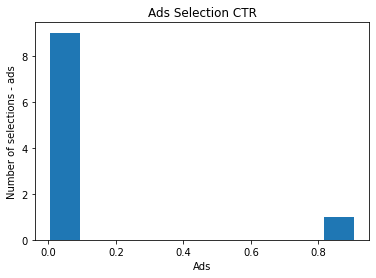

In [9]:
plt.hist(ads) #to plot a histogram
plt.title('Ads Selection CTR')
plt.xlabel('Ads')
plt.ylabel('Number of selections - ads')
plt.show()